<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-the-Iris-Dataset" data-toc-modified-id="Load-the-Iris-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the Iris Dataset</a></span></li><li><span><a href="#Setup-the-NN" data-toc-modified-id="Setup-the-NN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup the NN</a></span><ul class="toc-item"><li><span><a href="#Setting-up-call-backs" data-toc-modified-id="Setting-up-call-backs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Setting up call backs</a></span></li></ul></li></ul></div>

# Introduction

This notebook focuses on training a simple neural network, getting a dynamical system exported and then plotting the phase space of the weights.

# Load the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

def create_train_test(X,y):
    # One hot encoding
    enc = OneHotEncoder()
    Y = enc.fit_transform(y[:, np.newaxis]).toarray()

    # Scale data to have mean 0 and variance 1 
    # which is importance for convergence of the neural network
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data set into training and testing
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_scaled, Y, test_size=0.5, random_state=2)
    return X_train, X_test, Y_train, Y_test

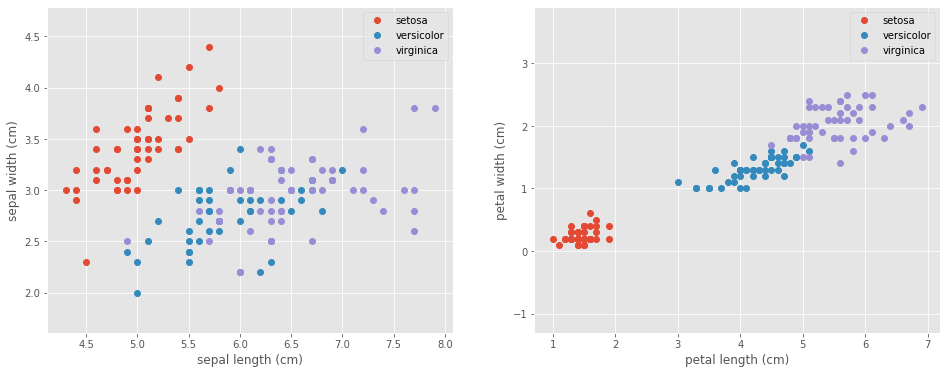

In [3]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

# Setup the NN

In [4]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, Y_train, Y_test = create_train_test(X[:,[2,3]],y)

print("X",X_train.shape,X_test.shape)
print("Y",Y_train.shape,Y_test.shape)

# define baseline model
def baseline_model(name):
    # create model
    model = Sequential(name=name)
    model.add(Dense(3, input_dim=X_train.shape[1],activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

baseline_model('model_test').summary()

Using TensorFlow backend.


X (75, 2) (75, 2)
Y (75, 3) (75, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Setting up call backs

Callbacks is a Tensorflow API that provides an opportunity to tap a model for various "pulse" checks during training. You store the loss, image, weights, model at each epoch, batch, or set of batches. I will be setting up two callbacks:
1. A checkpoint callback
2. A tensorboard callback

In [5]:
from keras.callbacks import TensorBoard, ModelCheckpoint

# TensorBoard Callback
# cb_tb = TensorBoard('./data/logs/tb')

# history_dict = {}

In [6]:
for i in range(20):
    name = 'model.'+str(i)
    cb_mc = ModelCheckpoint(name+'-'+'{epoch:02d}-{val_loss:.2f}.hdf5',verbose=1,save_weights_only=True,)
    model = baseline_model(name)
    history_callback = model.fit(X_train, Y_train,batch_size=5,epochs=50,verbose=0,validation_data=(X_test, Y_test),callbacks=[cb_mc])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss {0}:'.format(name), score[0])
    print('Test accuracy {0}:'.format(name), score[1])


Epoch 00001: saving model to model.0-01-1.71.hdf5

Epoch 00002: saving model to model.0-02-1.67.hdf5

Epoch 00003: saving model to model.0-03-1.64.hdf5

Epoch 00004: saving model to model.0-04-1.61.hdf5

Epoch 00005: saving model to model.0-05-1.58.hdf5

Epoch 00006: saving model to model.0-06-1.55.hdf5

Epoch 00007: saving model to model.0-07-1.52.hdf5

Epoch 00008: saving model to model.0-08-1.49.hdf5

Epoch 00009: saving model to model.0-09-1.46.hdf5

Epoch 00010: saving model to model.0-10-1.43.hdf5

Epoch 00011: saving model to model.0-11-1.41.hdf5

Epoch 00012: saving model to model.0-12-1.38.hdf5

Epoch 00013: saving model to model.0-13-1.35.hdf5

Epoch 00014: saving model to model.0-14-1.33.hdf5

Epoch 00015: saving model to model.0-15-1.30.hdf5

Epoch 00016: saving model to model.0-16-1.28.hdf5

Epoch 00017: saving model to model.0-17-1.26.hdf5

Epoch 00018: saving model to model.0-18-1.23.hdf5

Epoch 00019: saving model to model.0-19-1.21.hdf5

Epoch 00020: saving model to m


Epoch 00013: saving model to model.3-13-0.86.hdf5

Epoch 00014: saving model to model.3-14-0.84.hdf5

Epoch 00015: saving model to model.3-15-0.83.hdf5

Epoch 00016: saving model to model.3-16-0.82.hdf5

Epoch 00017: saving model to model.3-17-0.80.hdf5

Epoch 00018: saving model to model.3-18-0.79.hdf5

Epoch 00019: saving model to model.3-19-0.78.hdf5

Epoch 00020: saving model to model.3-20-0.77.hdf5

Epoch 00021: saving model to model.3-21-0.76.hdf5

Epoch 00022: saving model to model.3-22-0.75.hdf5

Epoch 00023: saving model to model.3-23-0.74.hdf5

Epoch 00024: saving model to model.3-24-0.73.hdf5

Epoch 00025: saving model to model.3-25-0.72.hdf5

Epoch 00026: saving model to model.3-26-0.71.hdf5

Epoch 00027: saving model to model.3-27-0.70.hdf5

Epoch 00028: saving model to model.3-28-0.69.hdf5

Epoch 00029: saving model to model.3-29-0.68.hdf5

Epoch 00030: saving model to model.3-30-0.68.hdf5

Epoch 00031: saving model to model.3-31-0.67.hdf5

Epoch 00032: saving model to m


Epoch 00027: saving model to model.6-27-0.47.hdf5

Epoch 00028: saving model to model.6-28-0.47.hdf5

Epoch 00029: saving model to model.6-29-0.46.hdf5

Epoch 00030: saving model to model.6-30-0.46.hdf5

Epoch 00031: saving model to model.6-31-0.46.hdf5

Epoch 00032: saving model to model.6-32-0.45.hdf5

Epoch 00033: saving model to model.6-33-0.45.hdf5

Epoch 00034: saving model to model.6-34-0.45.hdf5

Epoch 00035: saving model to model.6-35-0.44.hdf5

Epoch 00036: saving model to model.6-36-0.44.hdf5

Epoch 00037: saving model to model.6-37-0.44.hdf5

Epoch 00038: saving model to model.6-38-0.43.hdf5

Epoch 00039: saving model to model.6-39-0.43.hdf5

Epoch 00040: saving model to model.6-40-0.43.hdf5

Epoch 00041: saving model to model.6-41-0.42.hdf5

Epoch 00042: saving model to model.6-42-0.42.hdf5

Epoch 00043: saving model to model.6-43-0.42.hdf5

Epoch 00044: saving model to model.6-44-0.42.hdf5

Epoch 00045: saving model to model.6-45-0.41.hdf5

Epoch 00046: saving model to m


Epoch 00035: saving model to model.9-35-0.54.hdf5

Epoch 00036: saving model to model.9-36-0.54.hdf5

Epoch 00037: saving model to model.9-37-0.53.hdf5

Epoch 00038: saving model to model.9-38-0.53.hdf5

Epoch 00039: saving model to model.9-39-0.53.hdf5

Epoch 00040: saving model to model.9-40-0.52.hdf5

Epoch 00041: saving model to model.9-41-0.52.hdf5

Epoch 00042: saving model to model.9-42-0.51.hdf5

Epoch 00043: saving model to model.9-43-0.51.hdf5

Epoch 00044: saving model to model.9-44-0.51.hdf5

Epoch 00045: saving model to model.9-45-0.50.hdf5

Epoch 00046: saving model to model.9-46-0.50.hdf5

Epoch 00047: saving model to model.9-47-0.50.hdf5

Epoch 00048: saving model to model.9-48-0.49.hdf5

Epoch 00049: saving model to model.9-49-0.49.hdf5

Epoch 00050: saving model to model.9-50-0.48.hdf5
Test loss model.9: 0.4847547992070516
Test accuracy model.9: 0.8933333373069763

Epoch 00001: saving model to model.10-01-1.03.hdf5

Epoch 00002: saving model to model.10-02-1.01.hdf5



Epoch 00049: saving model to model.12-49-0.40.hdf5

Epoch 00050: saving model to model.12-50-0.40.hdf5
Test loss model.12: 0.395218745470047
Test accuracy model.12: 0.92

Epoch 00001: saving model to model.13-01-1.65.hdf5

Epoch 00002: saving model to model.13-02-1.62.hdf5

Epoch 00003: saving model to model.13-03-1.58.hdf5

Epoch 00004: saving model to model.13-04-1.55.hdf5

Epoch 00005: saving model to model.13-05-1.52.hdf5

Epoch 00006: saving model to model.13-06-1.49.hdf5

Epoch 00007: saving model to model.13-07-1.45.hdf5

Epoch 00008: saving model to model.13-08-1.43.hdf5

Epoch 00009: saving model to model.13-09-1.40.hdf5

Epoch 00010: saving model to model.13-10-1.37.hdf5

Epoch 00011: saving model to model.13-11-1.34.hdf5

Epoch 00012: saving model to model.13-12-1.31.hdf5

Epoch 00013: saving model to model.13-13-1.29.hdf5

Epoch 00014: saving model to model.13-14-1.26.hdf5

Epoch 00015: saving model to model.13-15-1.24.hdf5

Epoch 00016: saving model to model.13-16-1.21.hd


Epoch 00001: saving model to model.16-01-0.97.hdf5

Epoch 00002: saving model to model.16-02-0.95.hdf5

Epoch 00003: saving model to model.16-03-0.93.hdf5

Epoch 00004: saving model to model.16-04-0.91.hdf5

Epoch 00005: saving model to model.16-05-0.89.hdf5

Epoch 00006: saving model to model.16-06-0.87.hdf5

Epoch 00007: saving model to model.16-07-0.85.hdf5

Epoch 00008: saving model to model.16-08-0.83.hdf5

Epoch 00009: saving model to model.16-09-0.82.hdf5

Epoch 00010: saving model to model.16-10-0.80.hdf5

Epoch 00011: saving model to model.16-11-0.78.hdf5

Epoch 00012: saving model to model.16-12-0.77.hdf5

Epoch 00013: saving model to model.16-13-0.76.hdf5

Epoch 00014: saving model to model.16-14-0.74.hdf5

Epoch 00015: saving model to model.16-15-0.73.hdf5

Epoch 00016: saving model to model.16-16-0.72.hdf5

Epoch 00017: saving model to model.16-17-0.71.hdf5

Epoch 00018: saving model to model.16-18-0.69.hdf5

Epoch 00019: saving model to model.16-19-0.68.hdf5

Epoch 00020


Epoch 00010: saving model to model.19-10-0.64.hdf5

Epoch 00011: saving model to model.19-11-0.63.hdf5

Epoch 00012: saving model to model.19-12-0.62.hdf5

Epoch 00013: saving model to model.19-13-0.61.hdf5

Epoch 00014: saving model to model.19-14-0.60.hdf5

Epoch 00015: saving model to model.19-15-0.60.hdf5

Epoch 00016: saving model to model.19-16-0.59.hdf5

Epoch 00017: saving model to model.19-17-0.58.hdf5

Epoch 00018: saving model to model.19-18-0.57.hdf5

Epoch 00019: saving model to model.19-19-0.56.hdf5

Epoch 00020: saving model to model.19-20-0.56.hdf5

Epoch 00021: saving model to model.19-21-0.55.hdf5

Epoch 00022: saving model to model.19-22-0.54.hdf5

Epoch 00023: saving model to model.19-23-0.54.hdf5

Epoch 00024: saving model to model.19-24-0.53.hdf5

Epoch 00025: saving model to model.19-25-0.52.hdf5

Epoch 00026: saving model to model.19-26-0.52.hdf5

Epoch 00027: saving model to model.19-27-0.51.hdf5

Epoch 00028: saving model to model.19-28-0.51.hdf5

Epoch 00029

In [10]:
import os, h5py

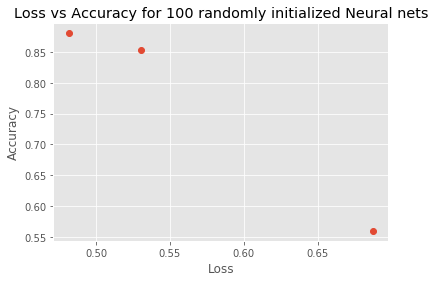

In [16]:
performance_data = []
for model_name in history_dict.keys():
    model = history_dict[model_name][1]
    score = model.evaluate(X_test, Y_test, verbose=0)
    performance_data.append([model_name,score[0],score[1]])

performance_df = pd.DataFrame(performance_data,columns=['Model Name','Loss','Accuracy'])
plt.plot(performance_df['Loss'],performance_df['Accuracy'],'o')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.title('Loss vs Accuracy for 100 randomly initialized Neural nets')
plt.show()

In [8]:

def get_bias(name):
    if 'bias' in name:
        print(name)
        return name

def get_kernel(name):
    if 'kernel' in name:
        print(name)
        return name
    
# f.visit(get_bias)

In [93]:
# type(f['dense_5/dense_5/bias:0'][:])

numpy.ndarray

In [11]:
model_weights={}
for fname in os.listdir('./data/logs/cp'):
    if 'hdf5' in fname:
        print(fname)
        f = h5py.File('./data/logs/cp/'+fname, 'r')
        model_weights[fname]={}
        model_weights[fname]['model_id']=fname.split('-')[0]
        model_weights[fname]['epoch']=fname.split('-')[1]
        model_weights[fname]['val_loss']=fname.split('-')[2].replace('.hdf5','')
        bias_name = f.visit(get_bias)
        model_weights[fname]['bias']=f[bias_name][:]
        kernel_name = f.visit(get_kernel)
        model_weights[fname]['kernel']=f[kernel_name][:]

model.8-47-0.37.hdf5
dense_10/dense_10/bias:0
dense_10/dense_10/kernel:0
model.15-30-1.08.hdf5
dense_17/dense_17/bias:0
dense_17/dense_17/kernel:0
model.15-39-0.94.hdf5
dense_17/dense_17/bias:0
dense_17/dense_17/kernel:0
model.13-24-1.05.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.15-19-1.31.hdf5
dense_17/dense_17/bias:0
dense_17/dense_17/kernel:0
model.8-05-0.56.hdf5
dense_10/dense_10/bias:0
dense_10/dense_10/kernel:0
model.13-14-1.26.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.11-11-1.26.hdf5
dense_13/dense_13/bias:0
dense_13/dense_13/kernel:0
model.2-36-0.85.hdf5
dense_4/dense_4/bias:0
dense_4/dense_4/kernel:0
model.0-03-1.64.hdf5
dense_2/dense_2/bias:0
dense_2/dense_2/kernel:0
model.11-35-0.86.hdf5
dense_13/dense_13/bias:0
dense_13/dense_13/kernel:0
model.17-18-2.24.hdf5
dense_19/dense_19/bias:0
dense_19/dense_19/kernel:0
model.0-27-1.06.hdf5
dense_2/dense_2/bias:0
dense_2/dense_2/kernel:0
model.3-40-0.61.hdf5
dense_5/dense_5/bias:0
dense_5/den

model.16-02-0.95.hdf5
dense_18/dense_18/bias:0
dense_18/dense_18/kernel:0
model.9-18-0.65.hdf5
dense_11/dense_11/bias:0
dense_11/dense_11/kernel:0
model.15-15-1.41.hdf5
dense_17/dense_17/bias:0
dense_17/dense_17/kernel:0
model.13-04-1.55.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.6-22-0.49.hdf5
dense_8/dense_8/bias:0
dense_8/dense_8/kernel:0
model.17-46-1.36.hdf5
dense_19/dense_19/bias:0
dense_19/dense_19/kernel:0
model.3-04-1.01.hdf5
dense_5/dense_5/bias:0
dense_5/dense_5/kernel:0
model.12-30-0.45.hdf5
dense_14/dense_14/bias:0
dense_14/dense_14/kernel:0
model.8-36-0.40.hdf5
dense_10/dense_10/bias:0
dense_10/dense_10/kernel:0
model.9-46-0.50.hdf5
dense_11/dense_11/bias:0
dense_11/dense_11/kernel:0
model.4-26-0.55.hdf5
dense_6/dense_6/bias:0
dense_6/dense_6/kernel:0
model.16-42-0.52.hdf5
dense_18/dense_18/bias:0
dense_18/dense_18/kernel:0
model.18-23-0.49.hdf5
dense_20/dense_20/bias:0
dense_20/dense_20/kernel:0
model.16-01-0.97.hdf5
dense_18/dense_18/bias:0
dense_18/

model.10-41-0.57.hdf5
dense_12/dense_12/bias:0
dense_12/dense_12/kernel:0
model.10-05-0.95.hdf5
dense_12/dense_12/bias:0
dense_12/dense_12/kernel:0
model.3-19-0.78.hdf5
dense_5/dense_5/bias:0
dense_5/dense_5/kernel:0
model.12-44-0.41.hdf5
dense_14/dense_14/bias:0
dense_14/dense_14/kernel:0
model.12-26-0.47.hdf5
dense_14/dense_14/bias:0
dense_14/dense_14/kernel:0
model.13-03-1.58.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.9-31-0.56.hdf5
dense_11/dense_11/bias:0
dense_11/dense_11/kernel:0
model.14-07-0.70.hdf5
dense_16/dense_16/bias:0
dense_16/dense_16/kernel:0
model.3-44-0.59.hdf5
dense_5/dense_5/bias:0
dense_5/dense_5/kernel:0
model.1-18-1.11.hdf5
dense_3/dense_3/bias:0
dense_3/dense_3/kernel:0
model.19-01-0.76.hdf5
dense_21/dense_21/bias:0
dense_21/dense_21/kernel:0
model.14-45-0.46.hdf5
dense_16/dense_16/bias:0
dense_16/dense_16/kernel:0
model.4-21-0.58.hdf5
dense_6/dense_6/bias:0
dense_6/dense_6/kernel:0
model.4-13-0.65.hdf5
dense_6/dense_6/bias:0
dense_6/dense_6

model.13-42-0.80.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.2-34-0.88.hdf5
dense_4/dense_4/bias:0
dense_4/dense_4/kernel:0
model.2-11-1.34.hdf5
dense_4/dense_4/bias:0
dense_4/dense_4/kernel:0
model.15-32-1.05.hdf5
dense_17/dense_17/bias:0
dense_17/dense_17/kernel:0
model.3-21-0.76.hdf5
dense_5/dense_5/bias:0
dense_5/dense_5/kernel:0
model.1-46-0.70.hdf5
dense_3/dense_3/bias:0
dense_3/dense_3/kernel:0
model.0-33-0.96.hdf5
dense_2/dense_2/bias:0
dense_2/dense_2/kernel:0
model.10-35-0.61.hdf5
dense_12/dense_12/bias:0
dense_12/dense_12/kernel:0
model.1-24-0.99.hdf5
dense_3/dense_3/bias:0
dense_3/dense_3/kernel:0
model.6-44-0.42.hdf5
dense_8/dense_8/bias:0
dense_8/dense_8/kernel:0
model.7-34-0.52.hdf5
dense_9/dense_9/bias:0
dense_9/dense_9/kernel:0
model.9-32-0.56.hdf5
dense_11/dense_11/bias:0
dense_11/dense_11/kernel:0
model.12-25-0.47.hdf5
dense_14/dense_14/bias:0
dense_14/dense_14/kernel:0
model.14-14-0.63.hdf5
dense_16/dense_16/bias:0
dense_16/dense_16/kernel:0
model

dense_4/dense_4/bias:0
dense_4/dense_4/kernel:0
model.5-17-0.73.hdf5
dense_7/dense_7/bias:0
dense_7/dense_7/kernel:0
model.10-04-0.97.hdf5
dense_12/dense_12/bias:0
dense_12/dense_12/kernel:0
model.17-26-1.94.hdf5
dense_19/dense_19/bias:0
dense_19/dense_19/kernel:0
model.4-41-0.48.hdf5
dense_6/dense_6/bias:0
dense_6/dense_6/kernel:0
model.6-30-0.46.hdf5
dense_8/dense_8/bias:0
dense_8/dense_8/kernel:0
model.1-02-1.56.hdf5
dense_3/dense_3/bias:0
dense_3/dense_3/kernel:0
model.7-26-0.55.hdf5
dense_9/dense_9/bias:0
dense_9/dense_9/kernel:0
model.18-31-0.46.hdf5
dense_20/dense_20/bias:0
dense_20/dense_20/kernel:0
model.14-38-0.49.hdf5
dense_16/dense_16/bias:0
dense_16/dense_16/kernel:0
model.13-06-1.49.hdf5
dense_15/dense_15/bias:0
dense_15/dense_15/kernel:0
model.9-10-0.72.hdf5
dense_11/dense_11/bias:0
dense_11/dense_11/kernel:0
model.14-26-0.54.hdf5
dense_16/dense_16/bias:0
dense_16/dense_16/kernel:0
model.12-21-0.48.hdf5
dense_14/dense_14/bias:0
dense_14/dense_14/kernel:0
model.9-45-0.50.

In [12]:
model_weights[list(model_weights.keys())[0]]

{'model_id': 'model.8',
 'epoch': '47',
 'val_loss': '0.37',
 'bias': array([-0.21356001,  0.37268743, -0.38910028], dtype=float32),
 'kernel': array([[-0.8792712 ,  0.41249606,  1.0654159 ],
        [-1.0904418 , -0.29829916,  1.0498354 ]], dtype=float32)}

In [13]:
df_weights = pd.DataFrame.from_dict(model_weights).T

In [14]:
df_weights.head(4)

,model_id,epoch,val_loss,bias,kernel
model.8-47-0.37.hdf5,model.8,47,0.37,"[-0.21356001, 0.37268743, -0.38910028]","[[-0.8792712, 0.41249606, 1.0654159], [-1.0904..."
model.15-30-1.08.hdf5,model.15,30,1.08,"[-0.037758652, 0.06794389, -0.008640021]","[[-0.9403562, -0.5721914, -0.35759053], [0.096..."
model.15-39-0.94.hdf5,model.15,39,0.94,"[-0.042164136, 0.06908825, -0.005596086]","[[-1.0362201, -0.53804994, -0.26444215], [0.00..."
model.13-24-1.05.hdf5,model.13,24,1.05,"[0.037757706, -0.06468837, 0.034898266]","[[0.10187056, 0.82145315, 0.62795573], [-0.579..."


In [15]:
def flatten_array(kk):
    flat_list = [item for sublist in kk for item in sublist]
    return flat_list

def explode_to_cols(df,col_name):
    if len(df[col_name].iloc[0].shape)>1:
        df[col_name]=df[col_name].apply(flatten_array)
    return pd.DataFrame(df[col_name].tolist(),index=df.index,columns=[col_name+'_'+str(i) for i in range(len(df[col_name].iloc[0]))])

In [16]:
df_bias = explode_to_cols(df_weights,'bias')
df_kernel = explode_to_cols(df_weights,'kernel')

In [17]:
print(len(df_weights))
df_tot = pd.concat([df_weights,df_bias,df_kernel],axis=1,join='inner')
print(len(df_tot))

1000
1000


In [18]:
df_tot.head(4)

,model_id,epoch,val_loss,bias,kernel,bias_0,bias_1,bias_2,kernel_0,kernel_1,kernel_2,kernel_3,kernel_4,kernel_5
model.8-47-0.37.hdf5,model.8,47,0.37,"[-0.21356001, 0.37268743, -0.38910028]","[-0.8792712, 0.41249606, 1.0654159, -1.0904418...",-0.213560,0.372687,-0.389100,-0.879271,0.412496,1.065416,-1.090442,-0.298299,1.049835
model.15-30-1.08.hdf5,model.15,30,1.08,"[-0.037758652, 0.06794389, -0.008640021]","[-0.9403562, -0.5721914, -0.35759053, 0.096327...",-0.037759,0.067944,-0.008640,-0.940356,-0.572191,-0.357591,0.096327,0.009308,-0.448859
model.15-39-0.94.hdf5,model.15,39,0.94,"[-0.042164136, 0.06908825, -0.005596086]","[-1.0362201, -0.53804994, -0.26444215, 0.00215...",-0.042164,0.069088,-0.005596,-1.036220,-0.538050,-0.264442,0.002151,-0.000308,-0.351811
model.13-24-1.05.hdf5,model.13,24,1.05,"[0.037757706, -0.06468837, 0.034898266]","[0.10187056, 0.82145315, 0.62795573, -0.579668...",0.037758,-0.064688,0.034898,0.101871,0.821453,0.627956,-0.579669,0.293350,-0.712462


In [19]:
df_tot.drop(['bias','kernel'],axis=1,inplace=True)
df_tot.to_csv('/Volumes/GoogleDrive/Shared drives/Deep Chaos/data/petals_9_params/model_dynamics.csv')